# Analyzing the WaterLLMarks results

## Reduced set


In [29]:
SETTINGS = {
    "seed": 1138,  # seed on which the experiment was run
    "n": 100,  # number of samples
    "dataset": "llm-papers",  # dataset name
    "model": "mistralai/Mistral-7B-Instruct-v0.3",
    "embedding": "intfloat/e5-mistral-7b-instruct",
}

### Evaluating the baseline

In [30]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_baseline_results_noempty.pkl"


In [31]:
from waterllmarks.evaluation import WLLMKResult

results = WLLMKResult.load(RESULTS_FILE)


In [32]:
df = results.details.drop(
    columns=[
        "user_input",
        "retrieved_contexts",
        "reference_contexts",
        "response",
        "reference",
    ]
)


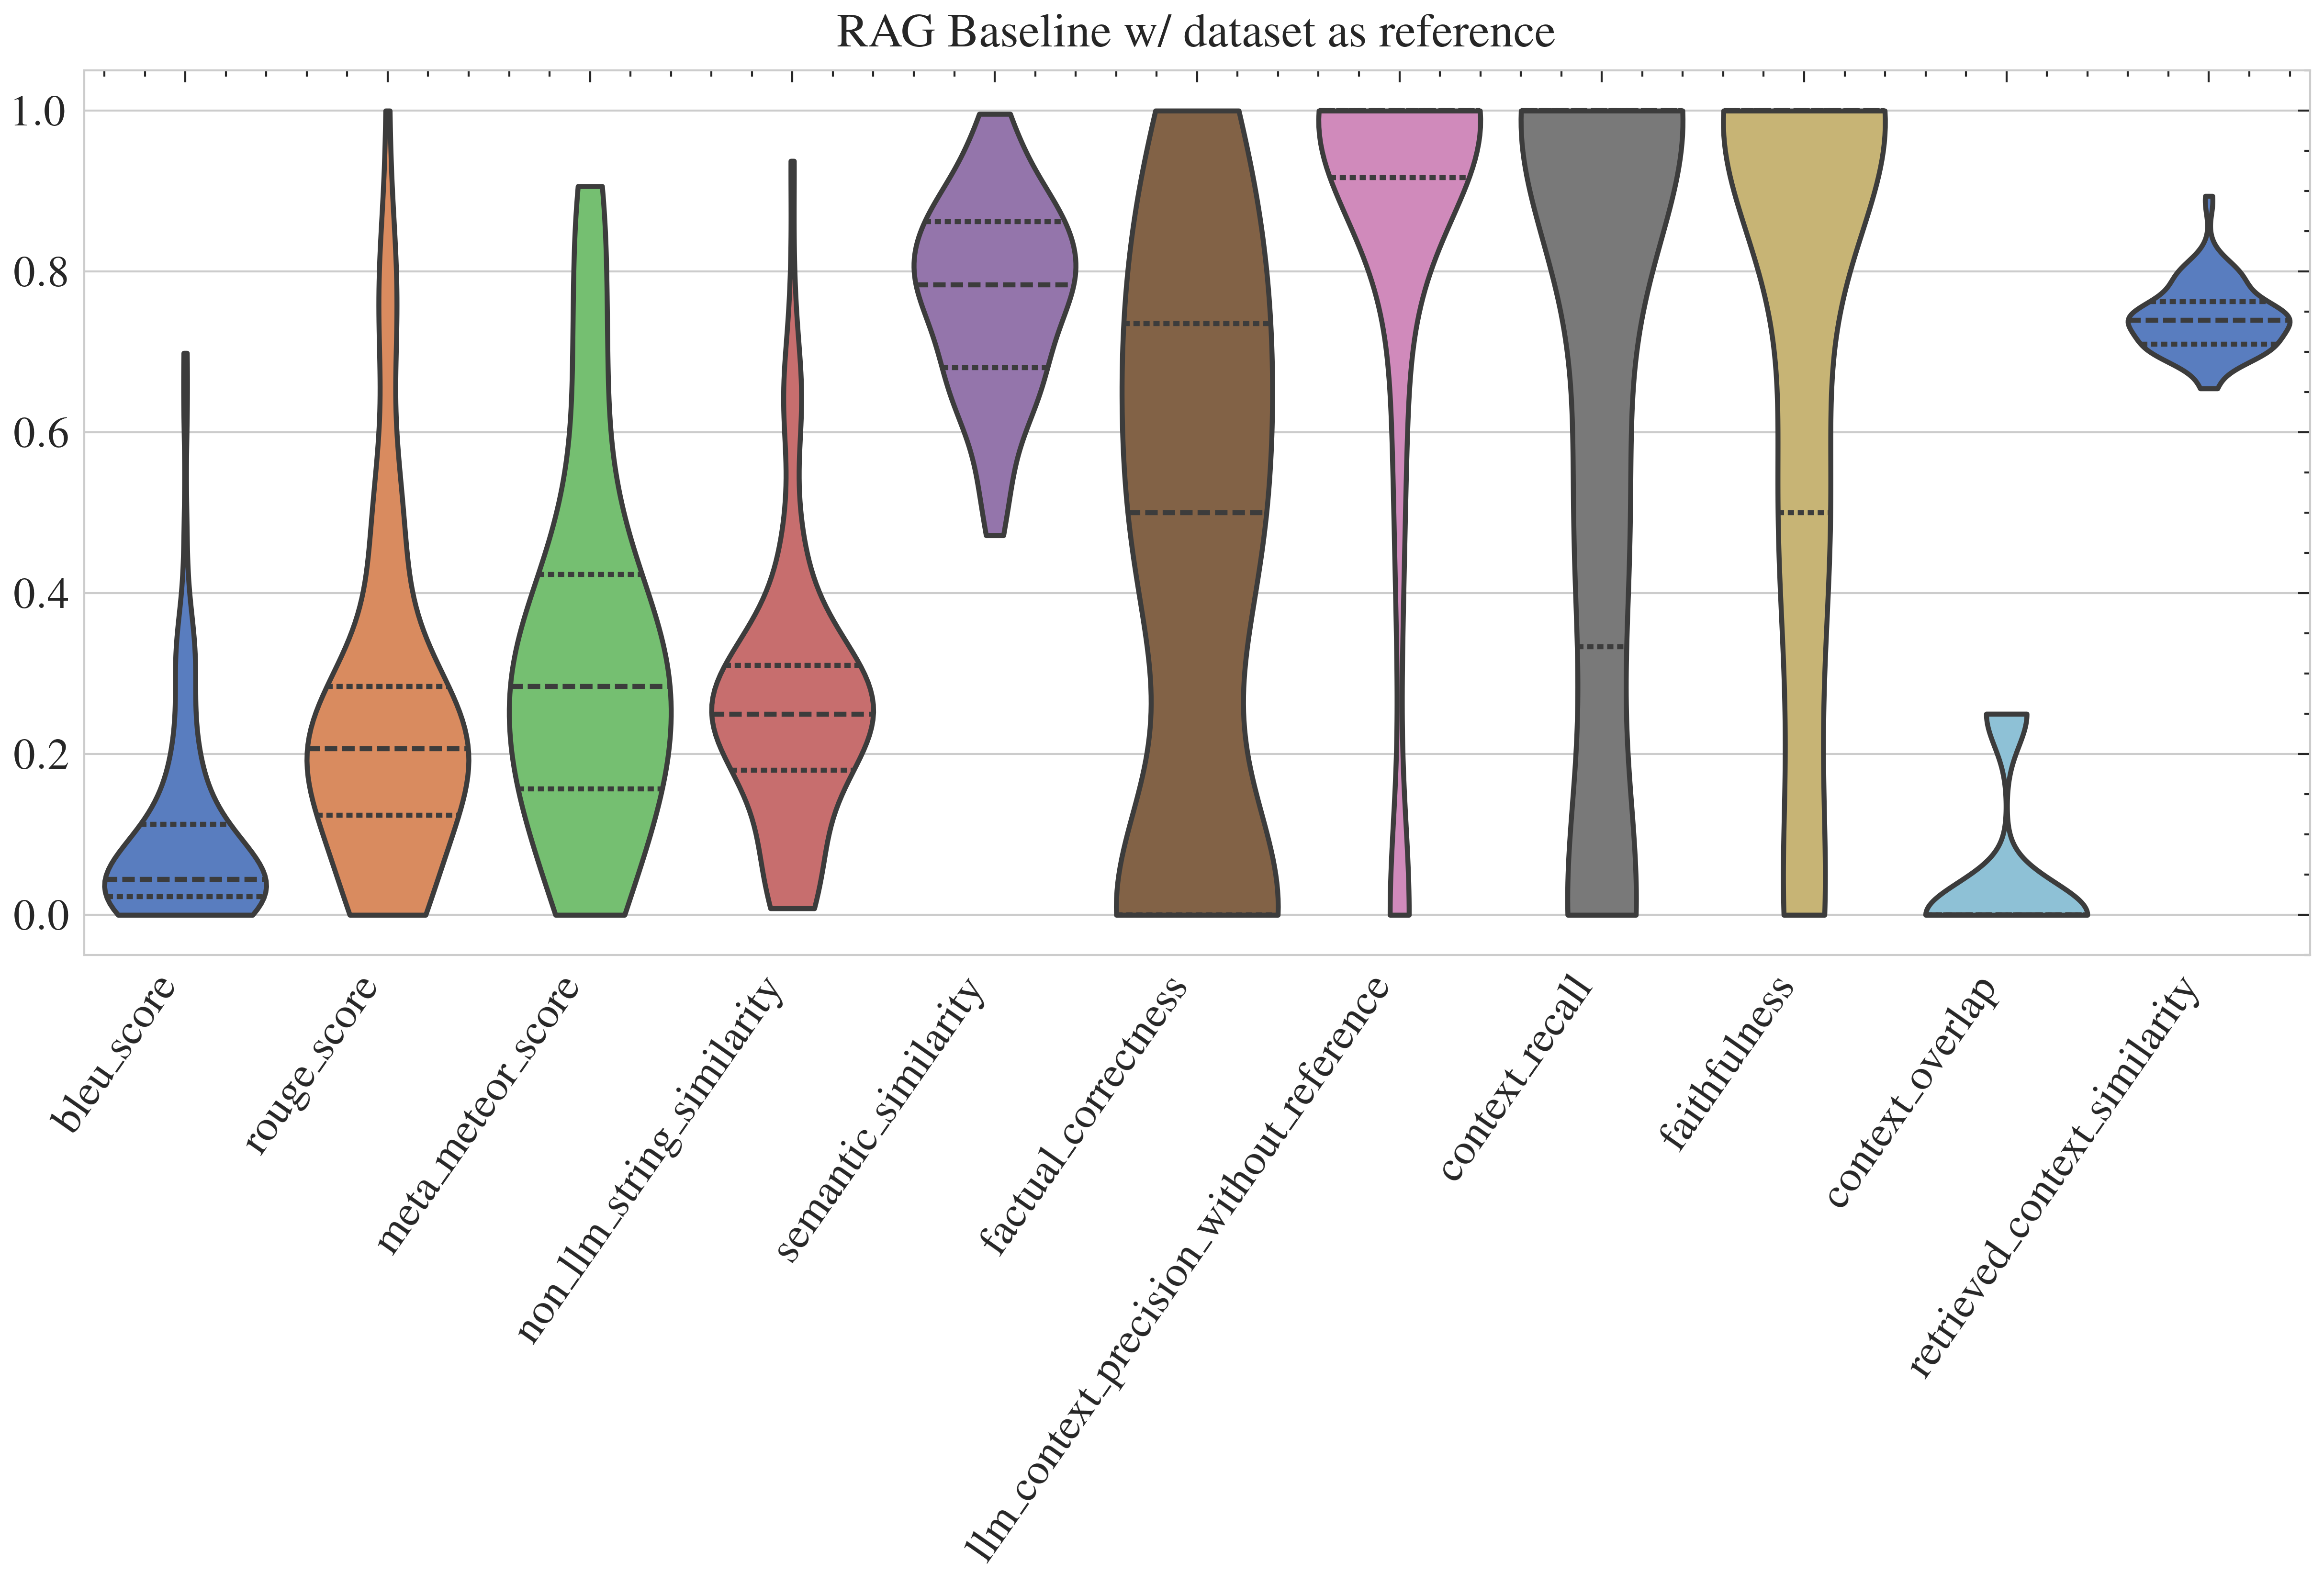

In [33]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(10, 4))
    sns.violinplot(data=df, cut=0, density_norm="count", palette="muted", inner="quart")
    plt.xticks(rotation=55, ha="right")
    plt.title("RAG Baseline w/ dataset as reference")
    plt.show()

### Watermarks

In [34]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_wllmk_results.pkl"
results = WLLMKResult.load(RESULTS_FILE)

In [35]:
import pandas as pd

df = pd.DataFrame()
for k, v in results.details.items():
    tdf = v.drop(
        columns=[
            "user_input",
            "retrieved_contexts",
            "reference_contexts",
            "response",
            "reference",
        ]
    )
    tdf["qidx"] = tdf.index
    tdf["exp"] = k
    df = pd.concat([df, tdf], ignore_index=True)

df


bleu_score  rouge_score  meta_meteor_score  non_llm_string_similarity  \
0      0.511566     0.434109           0.449567                   0.364224   
1      0.316789     0.236842           0.285561                   0.274090   
2      0.866398     0.894737           0.946719                   0.960317   
3      0.308520     0.202532           0.129876                   0.224467   
4      0.313245     0.262626           0.236809                   0.337143   
..          ...          ...                ...                        ...   
195    0.185708     0.488889           0.495595                   0.533333   
196    0.653919     0.782609           0.820304                   0.756757   
197    0.338546     0.396825           0.280436                   0.407173   
198    0.121311     0.158568           0.103639                   0.190498   
199    0.165078     0.262295           0.354730                   0.274510   

     semantic_similarity  factual_correctness  \
0               0.849104                 0.67   
1               0.776747                 0.29   
2               0.934509                 0.75   
3               0.895808                 0.50   
4               0.795604                 0.29   
..                   ...                  ...   
195             0.903674                 0.00   
196             0.969085                 1.00   
197             0.854652                 0.00   
198             0.860467                 0.00   
199             0.815183                 0.57   

     llm_context_precision_without_reference  context_recall  faithfulness  \
0                                       1.00        0.750000      0.333333   
1                                       0.00        1.000000      0.000000   
2                                       1.00        1.000000      1.000000   
3                                       1.00        0.857143      0.833333   
4                                       1.00        0.500000      0.750000   
..                                       ...             ...           ...   
195                                     1.00        1.000000      0.500000   
196                                     1.00        1.000000      1.000000   
197                                      NaN        0.333333           NaN   
198                                     1.00        1.000000      1.000000   
199                                     0.25        0.000000      0.000000   

     context_overlap  retrieved_context_similarity  qidx    exp  
0           0.142857                      0.657191     0  token  
1           0.142857                      0.716573     1  token  
2           0.600000                      0.787424     2  token  
3           0.142857                      0.769618     3  token  
4           0.000000                      0.698362     4  token  
..               ...                           ...   ...    ...  
195         0.600000                      0.769763    95  embed  
196         0.142857                      0.690691    96  embed  
197         0.000000                      0.686416    97  embed  
198         0.000000                      0.695763    98  embed  
199         0.000000                      0.663109    99  embed  

[200 rows x 13 columns]

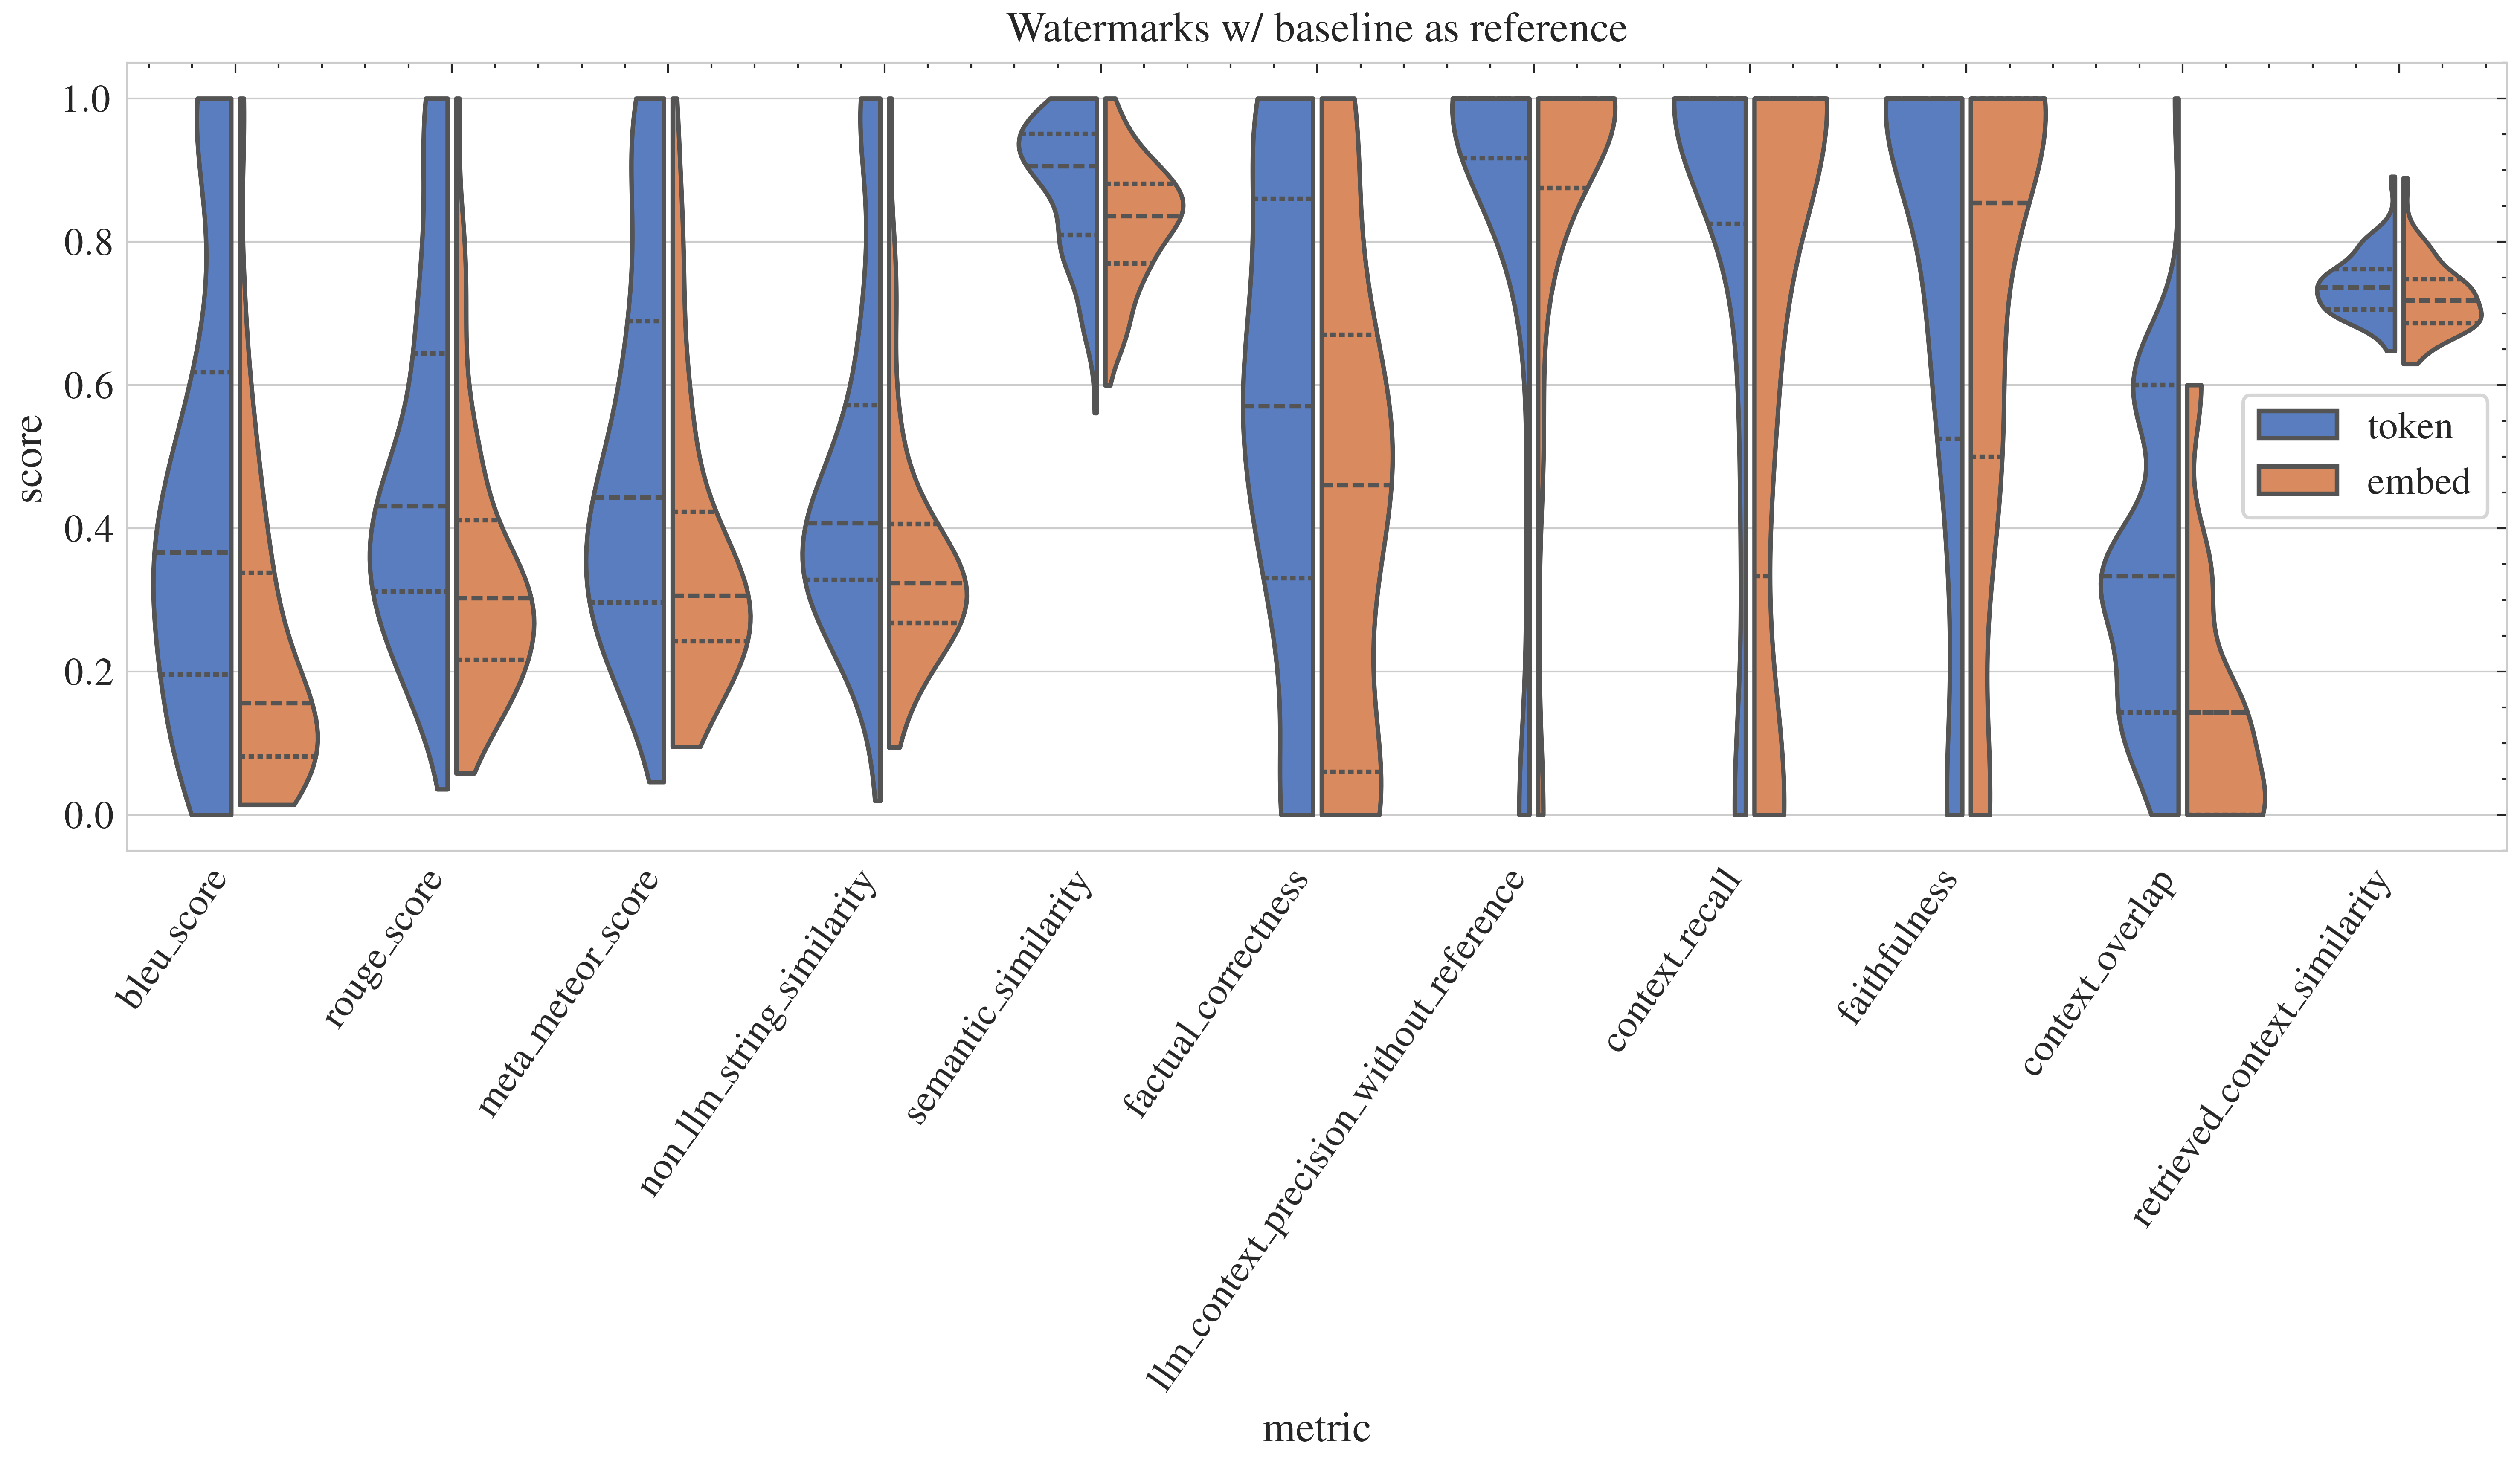

In [36]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
data = df.melt(id_vars=["exp", "qidx"], var_name="metric", value_name="score")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(12, 4))
    sns.violinplot(
        data=data,
        x="metric",
        y="score",
        split=True,
        hue="exp",
        cut=0,
        gap=0.1,
        inner="quartile",
        density_norm="count",
        palette="muted",
    )
    plt.legend(
        frameon=True,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("Watermarks w/ baseline as reference")
    plt.show()

## Full set

In [37]:
SETTINGS = {
    "seed": 1977,  # seed on which the experiment was run
    "n": 100,  # number of samples
    "dataset": "llm-papers",  # dataset name
    "model": "mistralai/Mistral-7B-Instruct-v0.3",
    "embedding": "intfloat/e5-mistral-7b-instruct",
}

### Evaluating the baseline

In [38]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_baseline_results_noempty.pkl"


In [39]:
from waterllmarks.evaluation import WLLMKResult

results = WLLMKResult.load(RESULTS_FILE)


In [40]:
df = results.details.drop(
    columns=[
        "user_input",
        "retrieved_contexts",
        "reference_contexts",
        "response",
        "reference",
    ]
)


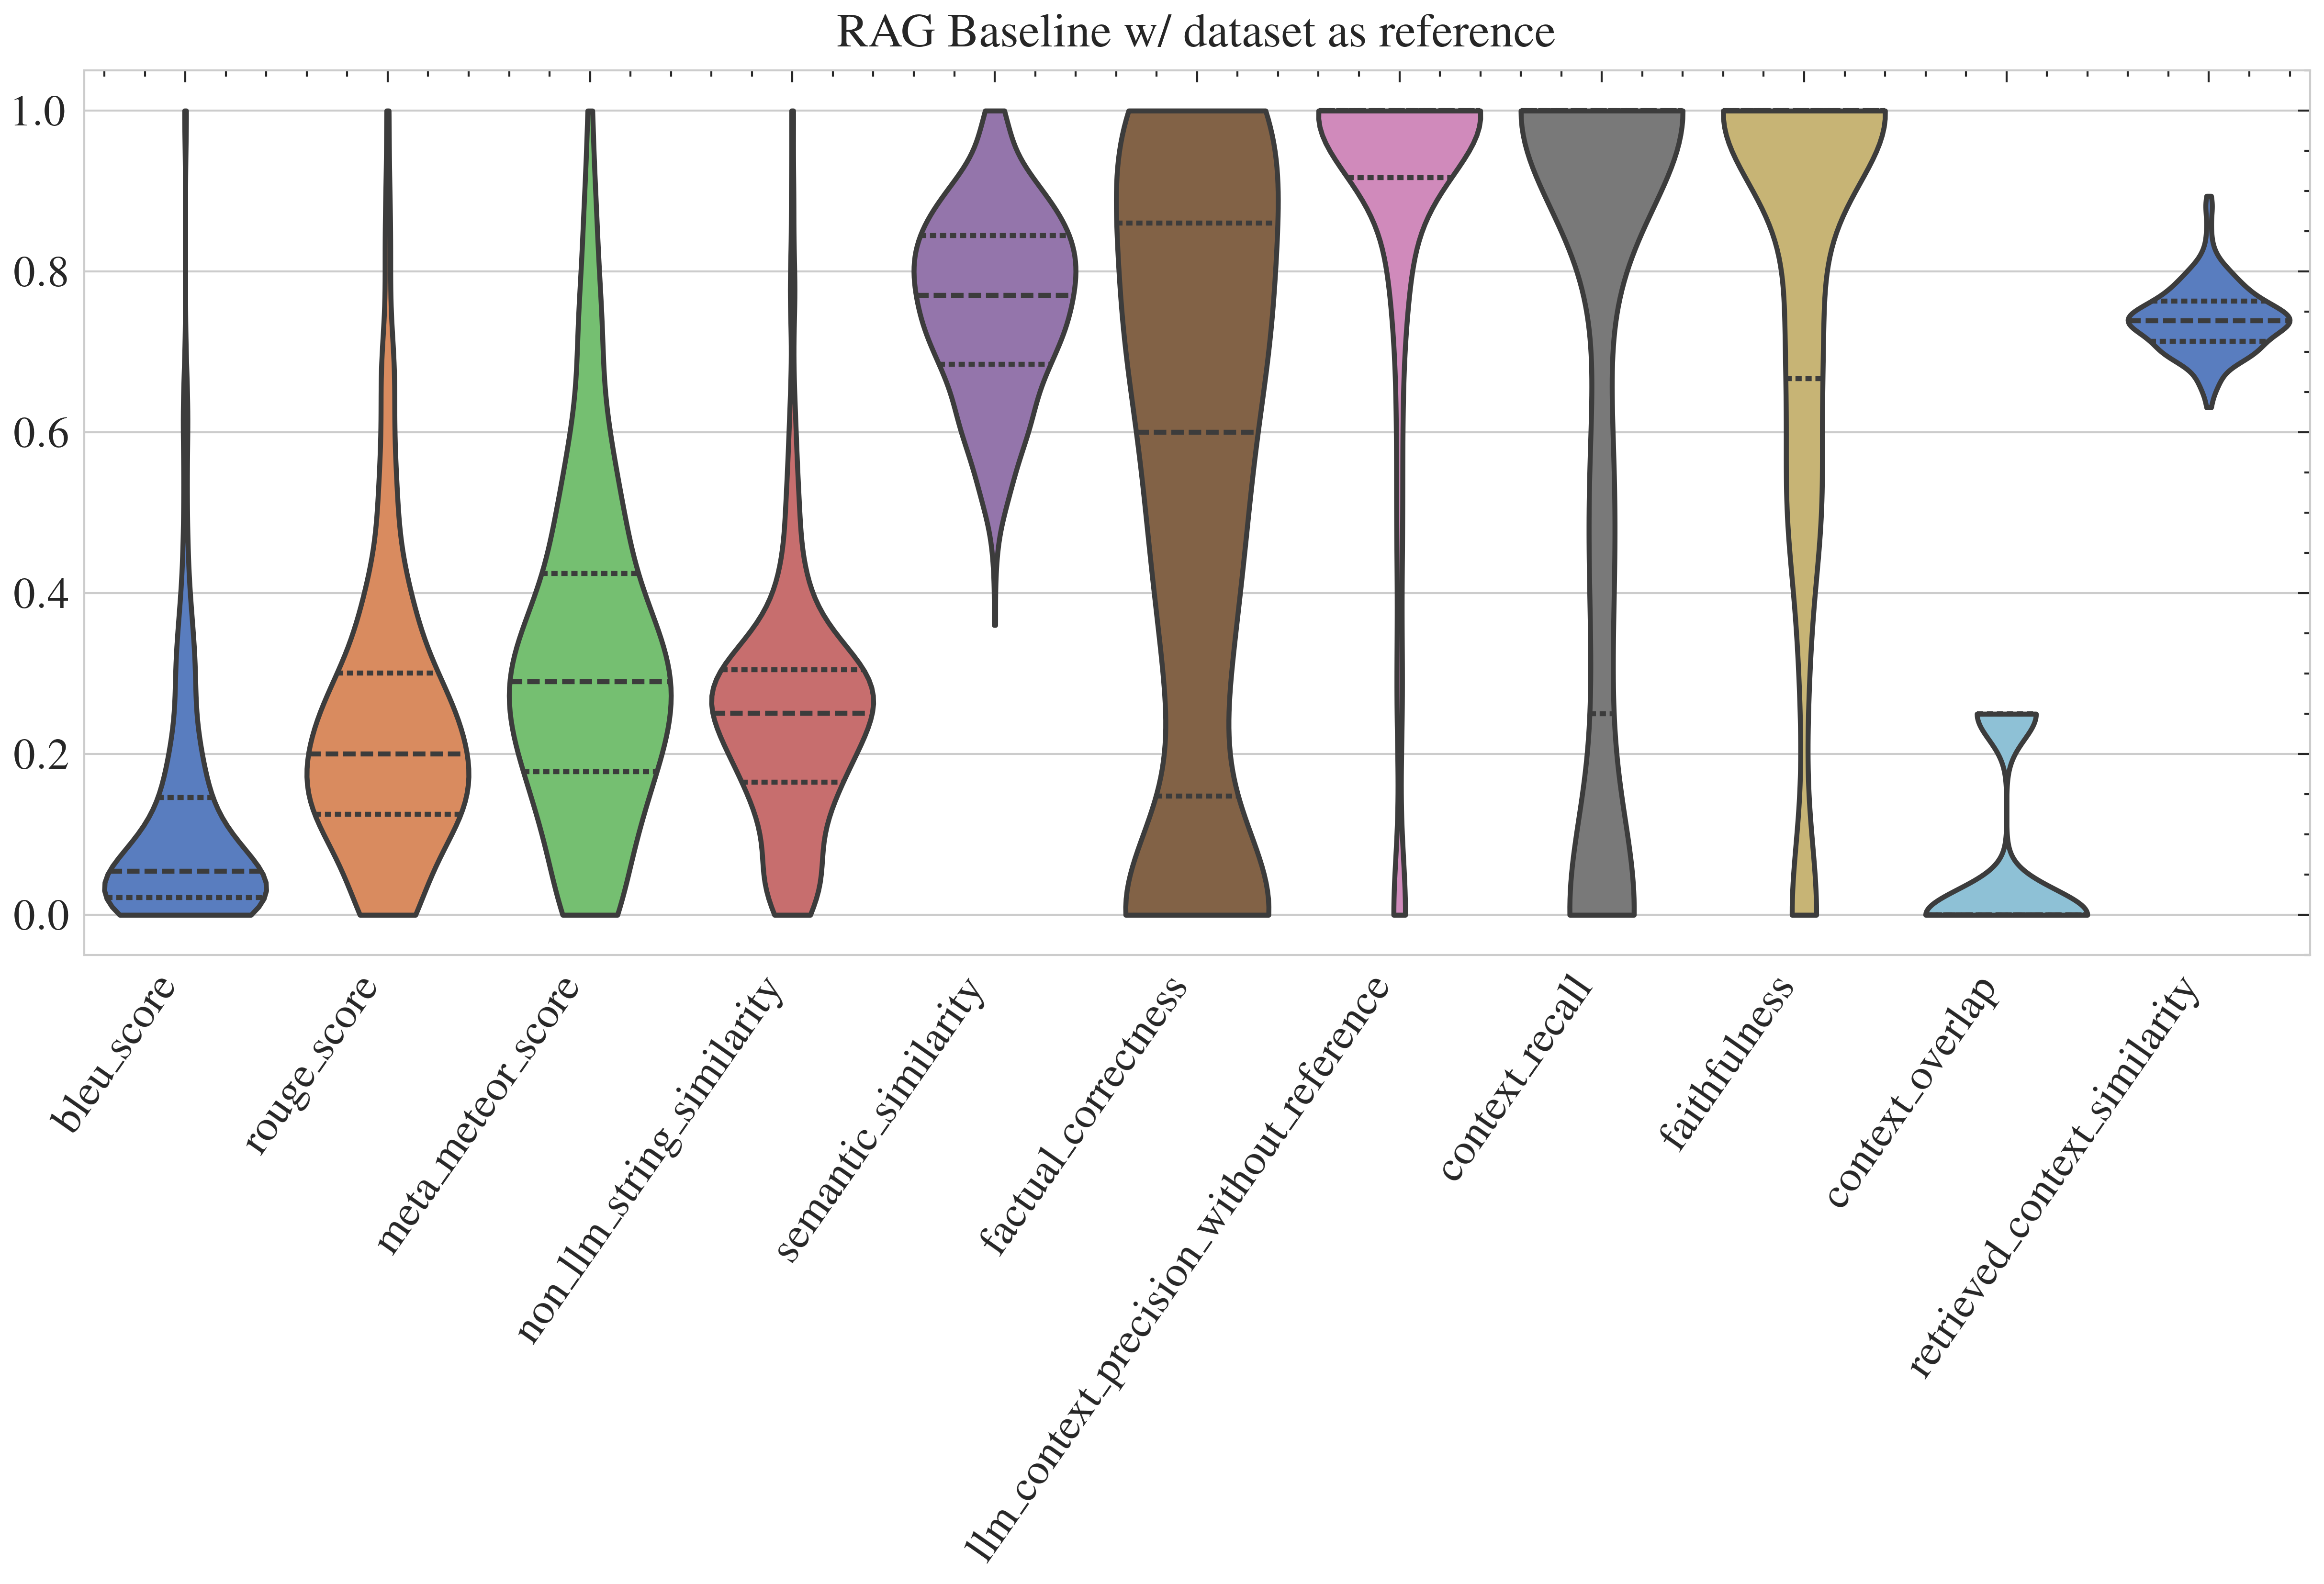

In [41]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(10, 4))
    sns.violinplot(data=df, cut=0, density_norm="count", palette="muted", inner="quart")
    plt.xticks(rotation=55, ha="right")
    plt.title("RAG Baseline w/ dataset as reference")
    plt.show()

### Watermarks

In [42]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_wllmk_results.pkl"
results = WLLMKResult.load(RESULTS_FILE)

In [43]:
import pandas as pd

df = pd.DataFrame()
for k, v in results.details.items():
    tdf = v.drop(
        columns=[
            "user_input",
            "retrieved_contexts",
            "reference_contexts",
            "response",
            "reference",
        ]
    )
    tdf["qidx"] = tdf.index
    tdf["exp"] = k
    df = pd.concat([df, tdf], ignore_index=True)

df


bleu_score  rouge_score  meta_meteor_score  non_llm_string_similarity  \
0       1.000000     0.629630           0.402000                   0.521839   
1       0.111244     0.291667           0.400370                   0.264605   
2       0.866398     0.894737           0.946719                   0.960317   
3       0.320054     0.312500           0.233638                   0.346614   
4       0.450984     0.285714           0.284944                   0.410526   
...          ...          ...                ...                        ...   
1033    0.123750     0.225352           0.234781                   0.360092   
1034    0.251962     0.238095           0.204201                   0.319728   
1035    0.001395     0.105727           0.089606                   0.113699   
1036    0.156127     0.269231           0.227370                   0.306785   
1037    0.533682     0.450000           0.505449                   0.415217   

      semantic_similarity  factual_correctness  \
0                0.911981                 1.00   
1                0.759346                 0.40   
2                0.934570                 0.75   
3                0.888850                 0.00   
4                0.858720                 0.73   
...                   ...                  ...   
1033             0.790045                 0.00   
1034             0.782727                 0.00   
1035             0.555043                 0.00   
1036             0.701592                 0.33   
1037             0.897712                 0.73   

      llm_context_precision_without_reference  context_recall  faithfulness  \
0                                    0.000000        0.000000          0.00   
1                                    0.000000        1.000000          0.00   
2                                    1.000000        1.000000          1.00   
3                                    1.000000        0.000000          0.60   
4                                    0.833333        0.333333          0.80   
...                                       ...             ...           ...   
1033                                 1.000000        1.000000          1.00   
1034                                 1.000000        1.000000          1.00   
1035                                 1.000000        1.000000          0.00   
1036                                 0.805556        1.000000          0.25   
1037                                 1.000000        0.666667          0.60   

      context_overlap  retrieved_context_similarity  qidx    exp  
0            0.142857                      0.650391     0  token  
1            0.142857                      0.716654     1  token  
2            0.600000                      0.787445     2  token  
3            0.142857                      0.769618     3  token  
4            0.000000                      0.698362     4  token  
...               ...                           ...   ...    ...  
1033         0.142857                      0.742482   514  embed  
1034         0.142857                      0.685316   515  embed  
1035         0.000000                      0.652024   516  embed  
1036         0.142857                      0.686033   517  embed  
1037         0.333333                      0.709701   518  embed  

[1038 rows x 13 columns]

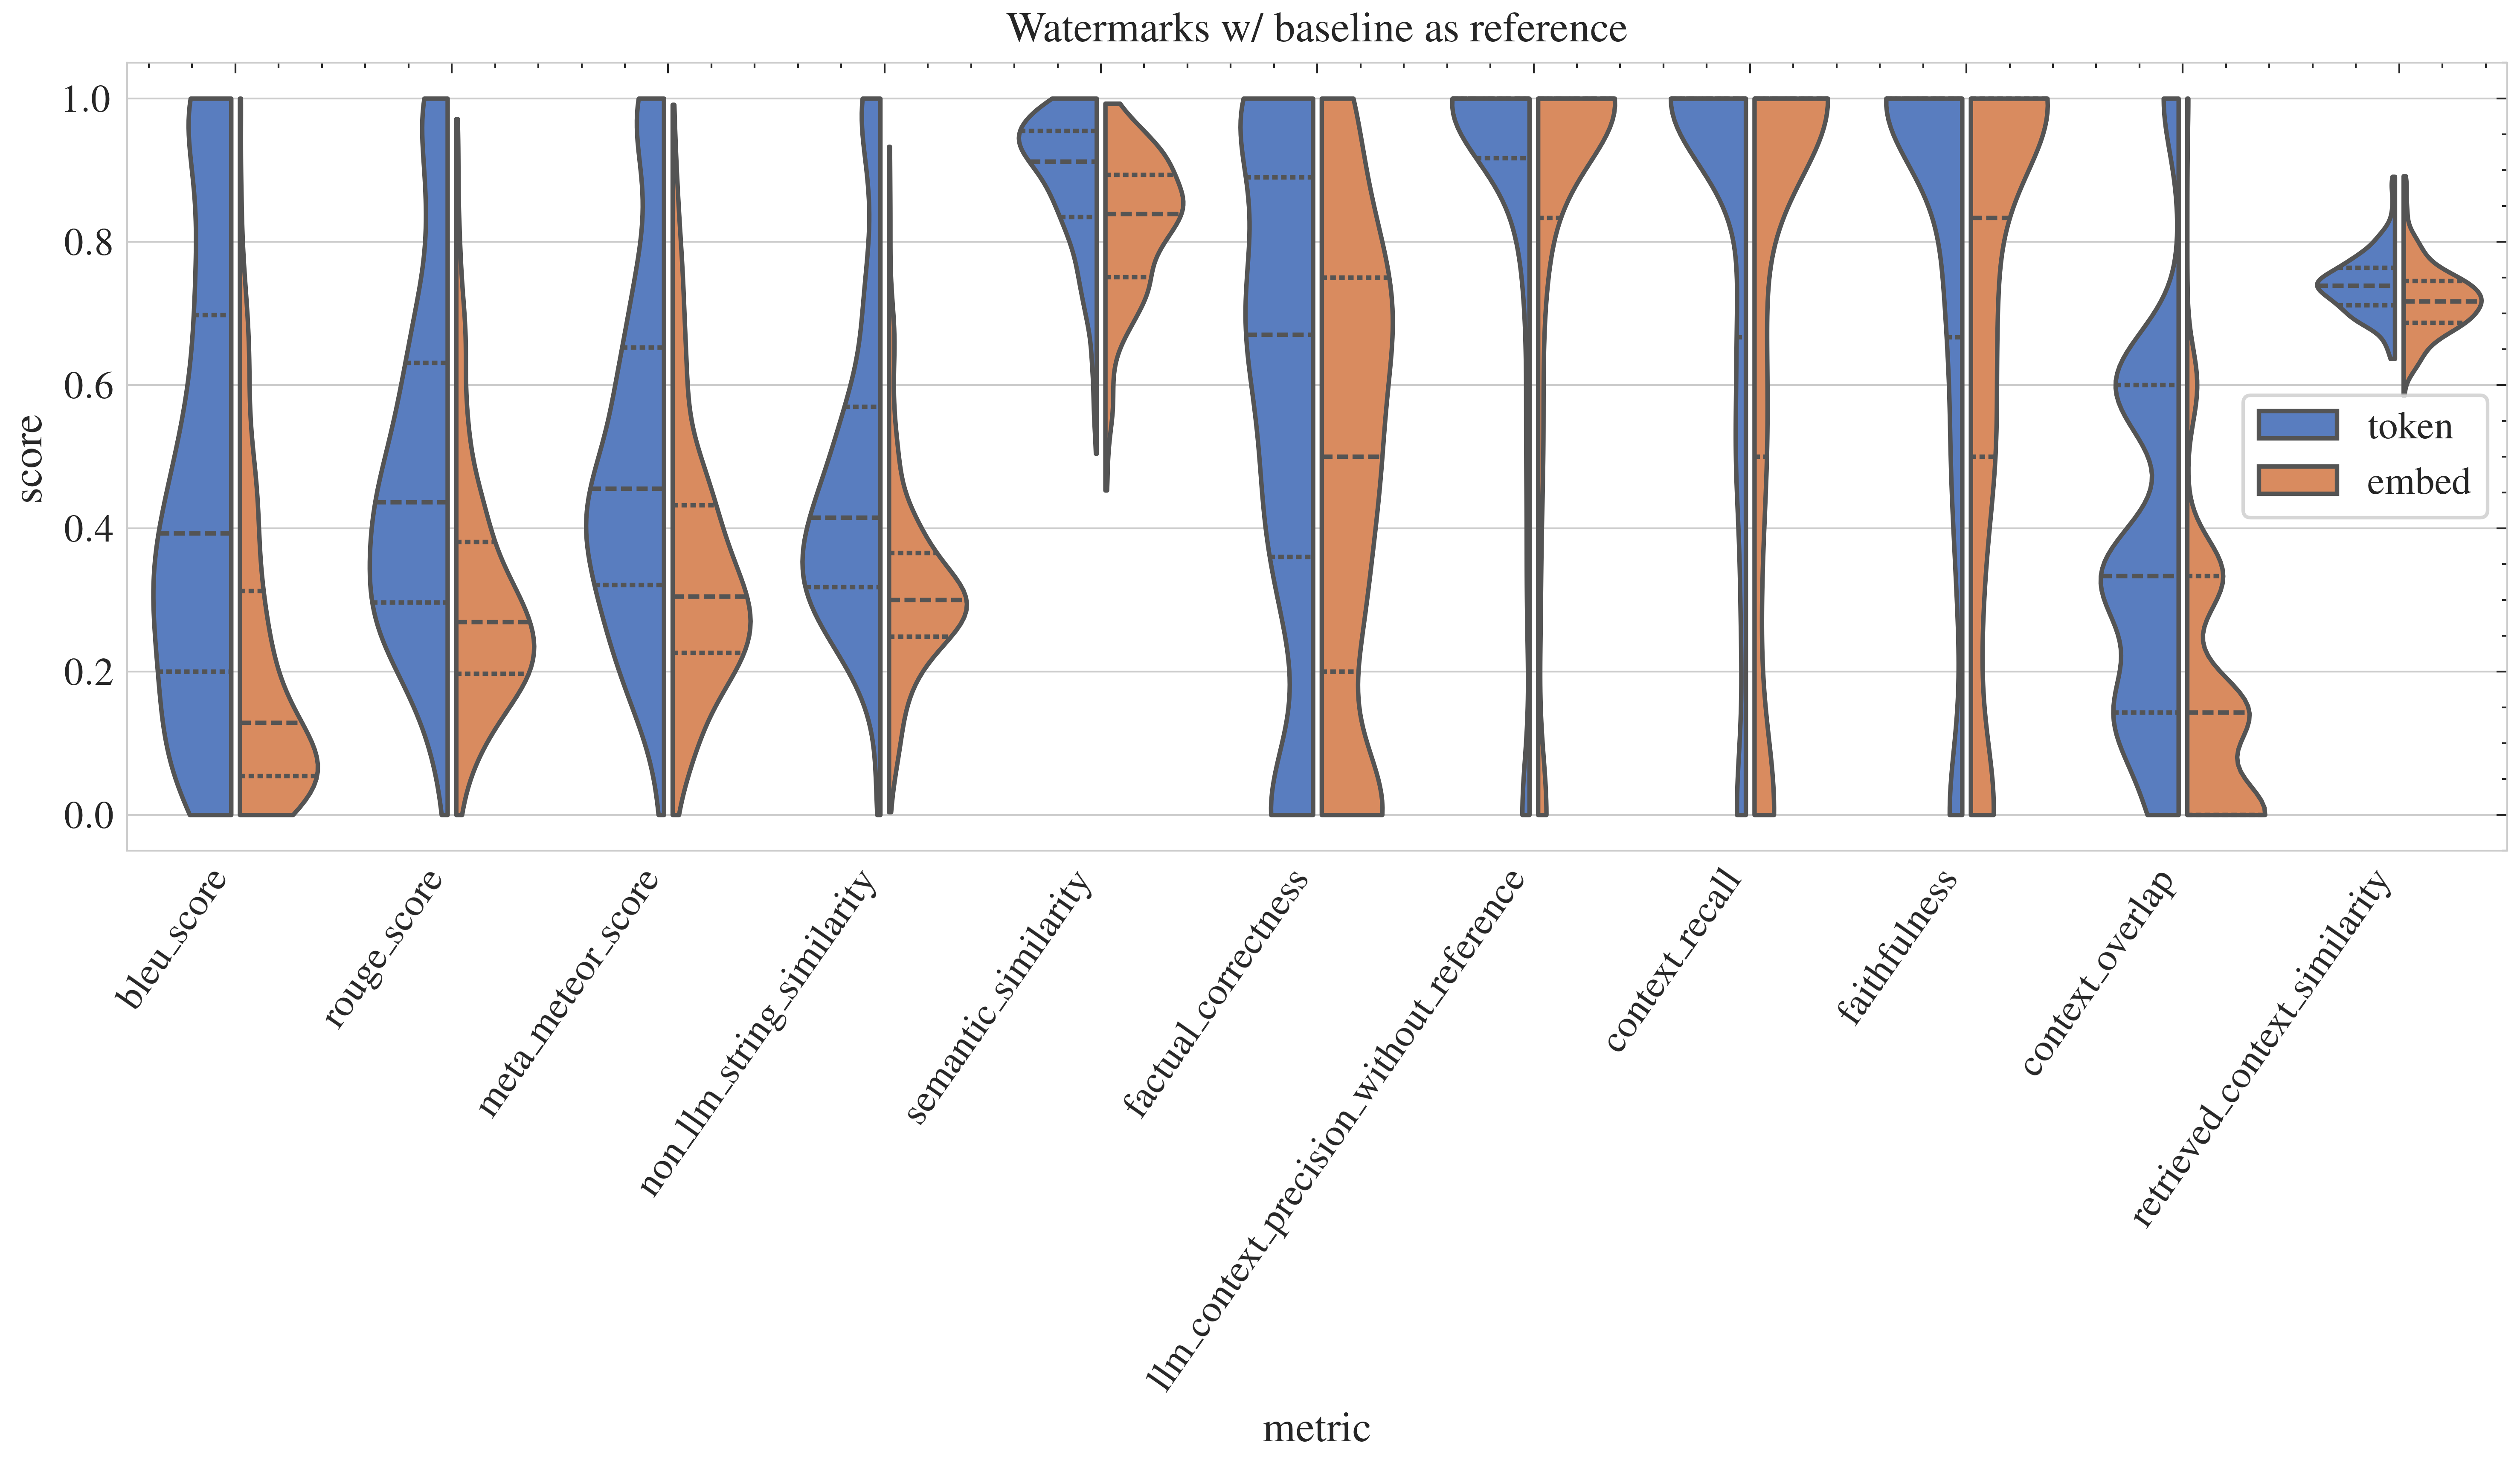

In [44]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
data = df.melt(id_vars=["exp", "qidx"], var_name="metric", value_name="score")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(12, 4))
    sns.violinplot(
        data=data,
        x="metric",
        y="score",
        split=True,
        hue="exp",
        cut=0,
        gap=0.1,
        inner="quartile",
        density_norm="count",
        palette="muted",
    )
    plt.legend(
        frameon=True,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("Watermarks w/ baseline as reference")
    plt.show()

### Augmented prompts vs. original

In [48]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_augmented_results.pkl"
results = WLLMKResult.load(RESULTS_FILE)

In [49]:
import pandas as pd

df = pd.DataFrame()
for k, v in results.details.items():
    tdf = v.drop(
        columns=[
            "user_input",
            "retrieved_contexts",
            "reference_contexts",
            "response",
            "reference",
        ]
    )
    tdf["qidx"] = tdf.index
    tdf["exp"] = k
    df = pd.concat([df, tdf], ignore_index=True)

df


bleu_score  rouge_score  meta_meteor_score  non_llm_string_similarity  \
0      0.000000     0.000000           0.000000                   0.005333   
1      0.621972     0.780488           0.781257                   0.775194   
2      0.343893     0.700000           0.747174                   0.650794   
3      0.019853     0.150000           0.147059                   0.189286   
4      0.024427     0.148148           0.311423                   0.219081   
..          ...          ...                ...                        ...   
709    0.032342     0.102190           0.134875                   0.247649   
710    0.002636     0.056338           0.042735                   0.196581   
711    0.000000     0.042553           0.060606                   0.232198   
712    0.015394     0.142857           0.179104                   0.205556   
713    0.008518     0.141176           0.129683                   0.263975   

     semantic_similarity  factual_correctness  \
0               0.360378                 0.00   
1               0.951430                 0.75   
2               0.895121                 0.00   
3               0.729099                 0.00   
4               0.828988                  NaN   
..                   ...                  ...   
709             0.593588                 0.40   
710             0.553615                 0.00   
711             0.562109                 0.00   
712             0.579088                 0.86   
713             0.624573                 0.00   

     llm_context_precision_without_reference  context_recall  faithfulness  \
0                                   1.000000             1.0      0.666667   
1                                   1.000000             1.0      1.000000   
2                                   0.638889             1.0      0.000000   
3                                   1.000000             1.0      0.800000   
4                                   1.000000             1.0      1.000000   
..                                       ...             ...           ...   
709                                 1.000000             0.0      0.428571   
710                                 0.750000             0.0      0.000000   
711                                 0.916667             0.0      0.000000   
712                                 0.805556             0.0      1.000000   
713                                      NaN             0.0      0.250000   

     context_overlap  retrieved_context_similarity  qidx        exp  
0                0.0                      0.657919     0   baseline  
1                0.0                      0.788591     2   baseline  
2                0.0                      0.709596     4   baseline  
3                0.0                      0.685867     5   baseline  
4                0.0                      0.717082     7   baseline  
..               ...                           ...   ...        ...  
709              0.0                      0.747547   352  augmented  
710              0.0                      0.706815   353  augmented  
711              0.0                      0.728312   354  augmented  
712              0.0                      0.718475   355  augmented  
713              0.0                      0.742126   356  augmented  

[714 rows x 13 columns]

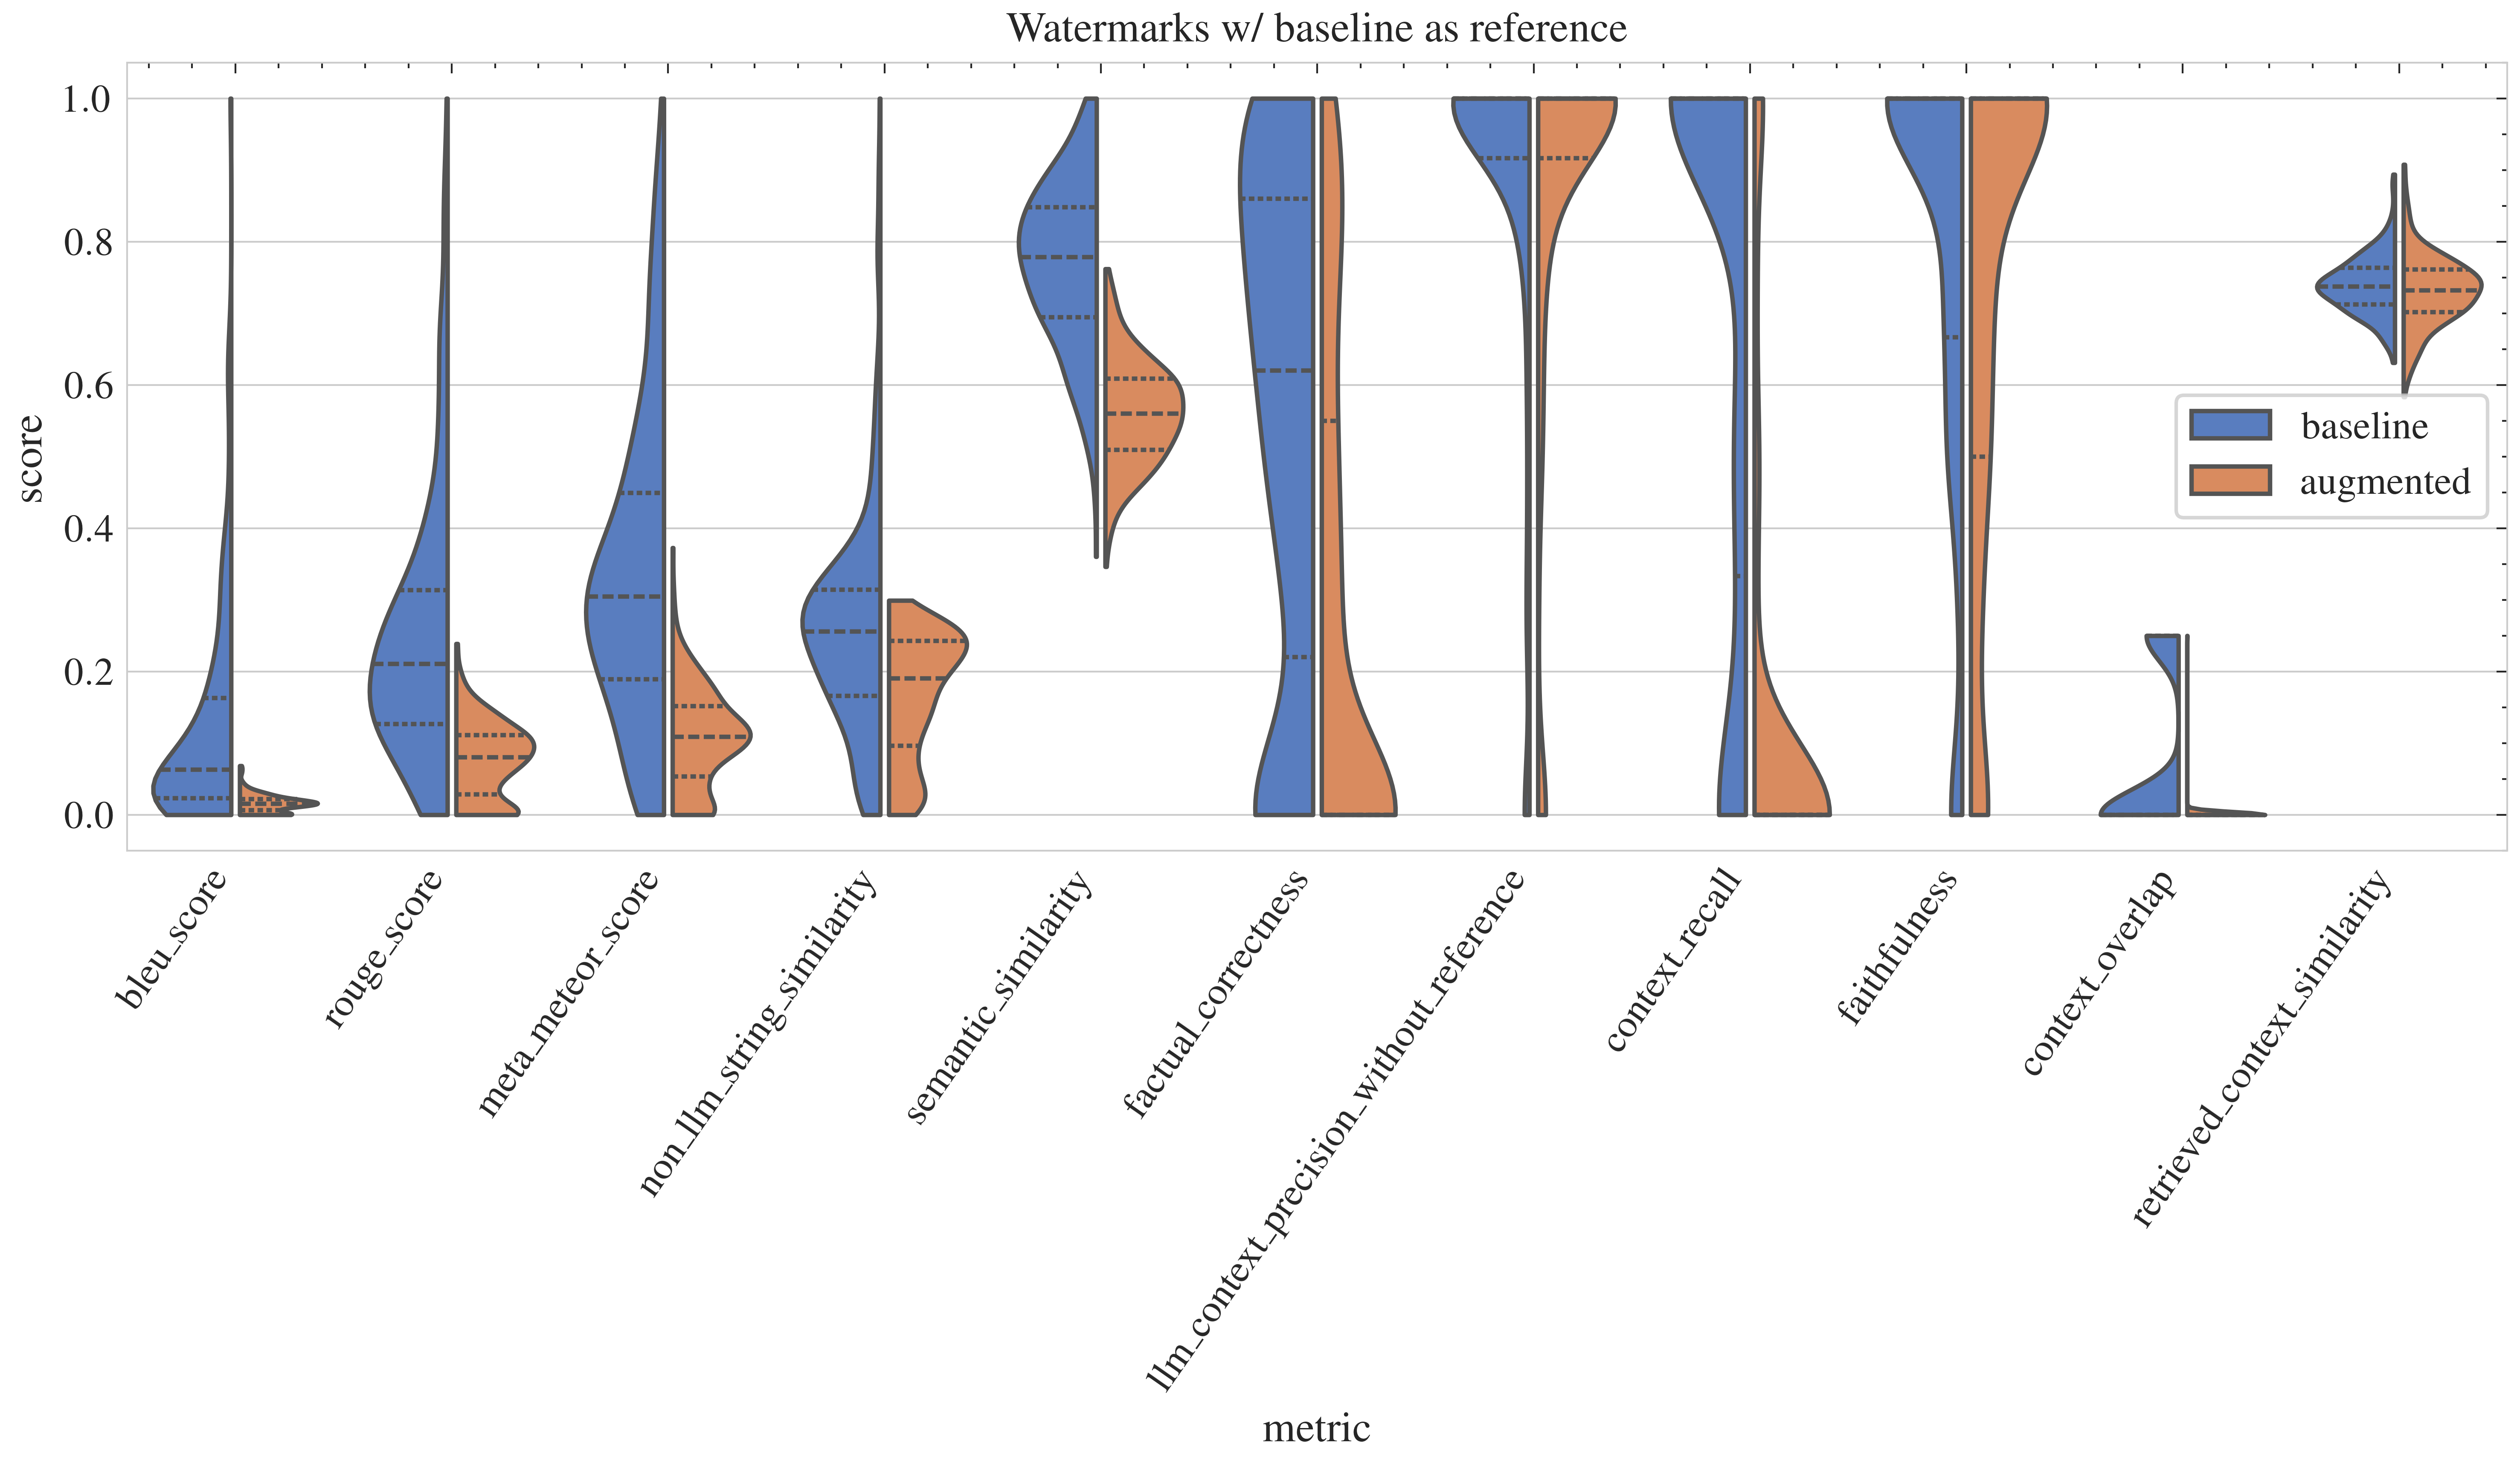

In [50]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
data = df.melt(id_vars=["exp", "qidx"], var_name="metric", value_name="score")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(12, 4))
    sns.violinplot(
        data=data,
        x="metric",
        y="score",
        split=True,
        hue="exp",
        cut=0,
        gap=0.1,
        inner="quartile",
        density_norm="count",
        palette="muted",
    )
    plt.legend(
        frameon=True,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("Watermarks w/ baseline as reference")
    plt.show()